In [ ]:
import pandas as pd
import time

In [ ]:
# Dataset collected from Kaggle:- https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset?resource=download&select=Amazon-Products.csv
# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Amazon-Products.csv'

In [ ]:
df = pd.read_csv(file_path) # load the dataset

In [ ]:
df

,sr. no,timestamp,asin_id,product_id,product_name,brand,main_category,sub_category,colour,discount_price,actual_price,ratings,no_of_ratings,image_count,videos_count,product_url
0,0,32:58.4,B06735349,P4557398,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,Pink,"₹32,999","₹58,990",4.2,"2,255",5,0,https://www.amazon.in/Lloyd-Inverter-Convertib...
1,1,33:58.4,B03787553,P3391120,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,Black,"₹46,490","₹75,990",4.2,"2,948",1,2,https://www.amazon.in/LG-Convertible-Anti-Viru...
2,2,34:58.4,B05465085,P9551625,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,Red,"₹34,490","₹61,990",4.2,"1,206",10,2,https://www.amazon.in/LG-Inverter-Convertible-...
3,3,35:58.4,B02646000,P6971464,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,Pink,"₹37,990","₹68,990",4,69,3,3,https://www.amazon.in/LG-Convertible-Anti-Viru...
4,4,36:58.4,B07510785,P8583334,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,Carrier,appliances,Air Conditioners,White,"₹34,490","₹67,790",4.1,630,5,3,https://www.amazon.in/Carrier-Inverter-Split-C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551580,1099,32:58.4,B07606722,P2809371,Adidas Regular Fit Men's Track Tops,Adidas,sports & fitness,Yoga,Orange,"₹3,449","₹4,599",3.2,9,2,0,https://www.amazon.in/Adidas-Regular-Mens-Trac...
551581,1100,33:58.4,B06105044,P1813325,Redwolf Noice Toit Smort - Hoodie (Black),Redwolf,sports & fitness,Yoga,Yellow,"₹1,199","₹1,999",2,2,6,0,https://www.amazon.in/Redwolf-Noice-Smort-Cott...
551582,1101,34:58.4,B03878181,P4918561,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),Redwolf,sports & fitness,Yoga,Blue,"₹1,199","₹1,999",4,1,4,1,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...
551583,1102,35:58.4,B03692992,P7299368,Puma Men Shorts,Puma,sports & fitness,Yoga,Grey,NaN,NaN,4.4,37,8,0,https://www.amazon.in/Puma-Woven-Short-5208526...


# **PySpark**

In [ ]:
# Importing the necessary Pyspark libraries
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, DateType
from pyspark.sql.functions import col, sum, countDistinct, count, regexp_replace, split, month, year, size, element_at, struct, trim, avg, expr, lit
from pyspark.sql import functions as F
from pyspark.sql.window import Window

In [ ]:
# Creating a SparkSession
spark = SparkSession.builder \
    .appName("Amazon_products") \
    .getOrCreate()

In [ ]:
# Defining the schema
schema = StructType([
    StructField("sr. no", IntegerType(), True),
    StructField("timestamp", DateType(), True),
    StructField("asin_id", StringType(), True),
    StructField("product_id", StringType(), True),
    StructField("product_name", StringType(), True),
    StructField("brand", StringType(), True),
    StructField("main_category", StringType(), True),
    StructField("sub_category", StringType(), True),
    StructField("colour", StringType(), True),
    StructField("discount_price", StringType(), True),
    StructField("actual_price", StringType(), True),
    StructField("ratings", DoubleType(), True),
    StructField("no_of_ratings", IntegerType(), True),
    StructField("image_count", IntegerType(), True),
    StructField("videos_count", IntegerType(), True),
    StructField("product_url", StringType(), True),
])

In [ ]:
# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Amazon-Products.csv'

# Start the timer
start_time = time.time()

# Read the CSV file into a DataFrame
df = spark.read.csv(file_path, schema=schema, header=True, quote='"', escape='"')

# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_columns = len(df.columns)

# Display the shape
print("Shape: {} rows and {} columns".format(num_rows, num_columns))

# Print the execution time
print("Execution Time using PySpark:", execution_time, "seconds")

Shape: 551585 rows and 16 columns
Execution Time using PySpark: 3.5428521633148193 seconds


# Some basic operations

In [ ]:
# Displaying a maximum of 16 columns so that we can scroll through our entire dataset horizontally
pd.options.display.max_columns = 16

In [ ]:
# Checking out the first 4 rows of the dataframe
df.limit(4).toPandas()

,sr. no,timestamp,asin_id,product_id,product_name,brand,main_category,sub_category,colour,discount_price,actual_price,ratings,no_of_ratings,image_count,videos_count,product_url
0,0,None,B06735349,P4557398,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,Pink,"₹32,999","₹58,990",4.2,NaN,5,0,https://www.amazon.in/Lloyd-Inverter-Convertib...
1,1,None,B03787553,P3391120,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,Black,"₹46,490","₹75,990",4.2,NaN,1,2,https://www.amazon.in/LG-Convertible-Anti-Viru...
2,2,None,B05465085,P9551625,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,Red,"₹34,490","₹61,990",4.2,NaN,10,2,https://www.amazon.in/LG-Inverter-Convertible-...
3,3,None,B02646000,P6971464,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,Pink,"₹37,990","₹68,990",4.0,69.0,3,3,https://www.amazon.in/LG-Convertible-Anti-Viru...


In [ ]:
df.limit(4).collect()

[Row(sr. no=0, timestamp=None, asin_id='B06735349', product_id='P4557398', product_name='Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1 Convertible, Copper, Anti-Viral + Pm 2.5 Filter, 2023 Model, White, Gls18I3...', brand='Lloyd', main_category='appliances', sub_category='Air Conditioners', colour='Pink', discount_price='₹32,999', actual_price='₹58,990', ratings=4.2, no_of_ratings=None, image_count=5, videos_count=0, product_url='https://www.amazon.in/Lloyd-Inverter-Convertible-Anti-Viral-GLS18I3FWAMC/dp/B0BRKXTSBT/ref=sr_1_4?qid=1679134237&s=kitchen&sr=1-4'),
 Row(sr. no=1, timestamp=None, asin_id='B03787553', product_id='P3391120', product_name='LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (Copper, Super Convertible 6-in-1 Cooling, HD Filter with Anti-Virus Protectio...', brand='LG', main_category='appliances', sub_category='Air Conditioners', colour='Black', discount_price='₹46,490', actual_price='₹75,990', ratings=4.2, no_of_ratings=None, image_count=1, videos_count=2, product_url=

In [ ]:
# Selecting specific columns only
df.select('brand', 'product_name', 'image_count', 'videos_count').limit(5).toPandas()

,brand,product_name,image_count,videos_count
0,Lloyd,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,5,0
1,LG,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,1,2
2,LG,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,10,2
3,LG,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,3,3
4,Carrier,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,5,3


In [ ]:
# Checking that the asin (Amazon Standard Identification Number) is unique
# The collect() method returns a list of rows, [0] is used to access the first row in the list,
# and [0] again is used to access the first element (the count of distinct values) in that row.
df.agg(countDistinct("asin_id")).collect()[0][0]

534993

In [ ]:
# Filtering the dataframe for a specific brand
df.filter(col('brand') == 'Voltas').limit(4).toPandas()

,sr. no,timestamp,asin_id,product_id,product_name,brand,main_category,sub_category,colour,discount_price,actual_price,ratings,no_of_ratings,image_count,videos_count,product_url
0,5,None,B01154374,P7552094,Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...,Voltas,appliances,Air Conditioners,Yellow,"₹31,990","₹70,990",4.0,NaN,8,0,https://www.amazon.in/Voltas-Adjustable-173V-V...
1,9,None,B08246349,P7947533,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",Voltas,appliances,Air Conditioners,Purple,"₹37,999","₹73,990",4.0,801.0,4,0,https://www.amazon.in/Voltas-Inverter-Split-Co...
2,26,None,B04148494,P5360020,"Voltas 1.5 Ton 5 Star, Inverter Window AC (Cop...",Voltas,appliances,Air Conditioners,Red,"₹36,700","₹49,990",3.8,360.0,8,3,https://www.amazon.in/Voltas-Adjustable-Invert...
3,30,None,B02075678,P8667876,"Voltas 2 Ton 3 Star, Inverter Split AC(Copper,...",Voltas,appliances,Air Conditioners,Orange,"₹44,990","₹79,990",4.6,3.0,3,1,https://www.amazon.in/Voltas-Adjustable-Invert...


In [ ]:
# Filtering the dataframe for products with more than 5 images
df.filter(col('image_count') > 5).select('asin_id','image_count').limit(4).toPandas()

,asin_id,image_count
0,B05465085,10
1,B01154374,8
2,B03354431,7
3,B08599455,8


In [ ]:
# Filtering the dataframe for products with more than 6 images and more than 3 videos
df.filter((col('image_count') > 6) & (col('videos_count') > 3)).select('asin_id', 'brand', 'product_name', 'image_count', 'videos_count').limit(4).toPandas()

,asin_id,brand,product_name,image_count,videos_count
0,B08599455,Lloyd,Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...,8,4
1,B05028515,LG,LG 1.5 Ton 2 Star DUAL Inverter Split AC (Copp...,7,4
2,B05501864,Panasonic,Panasonic 2 Ton 3 Star Wi-Fi Inverter Smart Sp...,7,5
3,B03660490,CARRIER,CARRIER SPLIT AC 1 TON 3 STAR FIX SPEED (12K 3...,7,5


# Keeping only columns of interest

In [ ]:
cols = ['asin_id', 'brand', 'main_category', 'sub_category', 'product_name', 'discount_price', 'actual_price', 'product_url',
       'image_count', 'videos_count', 'ratings']

In [ ]:
# Re-read the dataframe to include 'sub_category' column
df = spark.read.csv(file_path, schema=schema, header=True, quote='"', escape='"')

# Now you can select the desired columns including 'sub_category'
df = df.select(cols)

In [ ]:
df.limit(6).toPandas()

,asin_id,brand,main_category,sub_category,product_name,discount_price,actual_price,product_url,image_count,videos_count,ratings
0,B06735349,Lloyd,appliances,Air Conditioners,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,"₹32,999","₹58,990",https://www.amazon.in/Lloyd-Inverter-Convertib...,5,0,4.2
1,B03787553,LG,appliances,Air Conditioners,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"₹46,490","₹75,990",https://www.amazon.in/LG-Convertible-Anti-Viru...,1,2,4.2
2,B05465085,LG,appliances,Air Conditioners,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,"₹34,490","₹61,990",https://www.amazon.in/LG-Inverter-Convertible-...,10,2,4.2
3,B02646000,LG,appliances,Air Conditioners,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,"₹37,990","₹68,990",https://www.amazon.in/LG-Convertible-Anti-Viru...,3,3,4.0
4,B07510785,Carrier,appliances,Air Conditioners,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,"₹34,490","₹67,790",https://www.amazon.in/Carrier-Inverter-Split-C...,5,3,4.1
5,B01154374,Voltas,appliances,Air Conditioners,Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...,"₹31,990","₹70,990",https://www.amazon.in/Voltas-Adjustable-173V-V...,8,0,4.0


## How many null values do we have in the dataframe?

In [ ]:
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])

# Display the null counts
null_counts.toPandas()

,asin_id,brand,main_category,sub_category,product_name,discount_price,actual_price,product_url,image_count,videos_count,ratings
0,0,0,0,0,0,61163,17813,0,0,0,182027


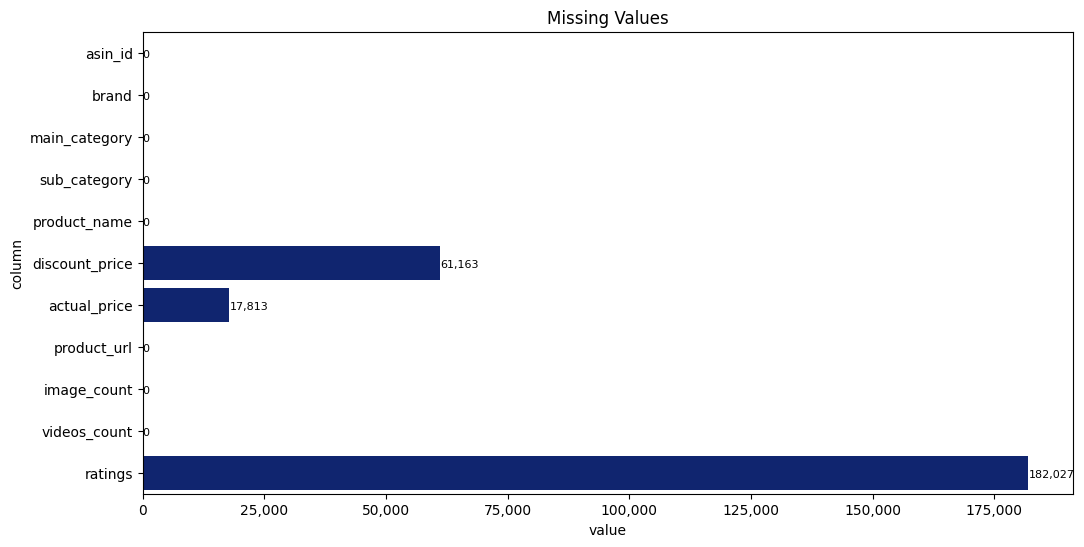

In [ ]:
transposed_df = null_counts.toPandas().T.reset_index()

# Rename the columns
transposed_df.columns = ['column', 'value']

# Set the figure size for the chart
plt.figure(figsize=(12, 6))

# Create a horizontal bar chart using Seaborn with the custom figure size
ax = sns.barplot(x='value', y='column', data=transposed_df)
sns.set_palette("dark")

# Set the chart title
plt.title('Missing Values')

for p in ax.patches:
    width = p.get_width()
    value = '{:,.0f}'.format(width)
    x = width + 0.1
    y = p.get_y() + p.get_height() / 2 + 0.1
    ax.annotate(value, (x, y), fontsize=8)

# Format y-axis labels with a thousands comma separator
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Display the chart
plt.show()

# Clean and transform the final_price column

In [ ]:
# Get the first price if there are two prices listed
df = df.withColumn("discount_price", split(col("discount_price"), " ").getItem(0))
df = df.withColumn("actual_price", split(col("actual_price"), " ").getItem(0))

In [ ]:
# Drop the rows where the price is missing
df = df.na.drop(subset=["discount_price"])
df = df.na.drop(subset=["actual_price"])

In [ ]:
# Double check that there's definitely no missing values in the total_price column
df.filter(col("discount_price").isNull()).count()

0

In [ ]:
df.filter(col("actual_price").isNull()).count()

0

In [ ]:
# Remove the ₹ sign from the discount_price and actual_price columns and change the data type from string to double
df = df.withColumn("discount_price", regexp_replace(col("discount_price"), "[IN₹,]", "").cast('double'))
df = df.withColumn("actual_price", regexp_replace(col("actual_price"), "[IN₹,]", "").cast('double'))

In [ ]:
df.limit(6).toPandas()

,asin_id,brand,main_category,sub_category,product_name,discount_price,actual_price,product_url,image_count,videos_count,ratings
0,B06735349,Lloyd,appliances,Air Conditioners,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,32999.0,58990.0,https://www.amazon.in/Lloyd-Inverter-Convertib...,5,0,4.2
1,B03787553,LG,appliances,Air Conditioners,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,46490.0,75990.0,https://www.amazon.in/LG-Convertible-Anti-Viru...,1,2,4.2
2,B05465085,LG,appliances,Air Conditioners,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,34490.0,61990.0,https://www.amazon.in/LG-Inverter-Convertible-...,10,2,4.2
3,B02646000,LG,appliances,Air Conditioners,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,37990.0,68990.0,https://www.amazon.in/LG-Convertible-Anti-Viru...,3,3,4.0
4,B07510785,Carrier,appliances,Air Conditioners,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,34490.0,67790.0,https://www.amazon.in/Carrier-Inverter-Split-C...,5,3,4.1
5,B01154374,Voltas,appliances,Air Conditioners,Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...,31990.0,70990.0,https://www.amazon.in/Voltas-Adjustable-173V-V...,8,0,4.0


In [ ]:
# Check the schema
df.printSchema()

root
 |-- asin_id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- main_category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- discount_price: double (nullable = true)
 |-- actual_price: double (nullable = true)
 |-- product_url: string (nullable = true)
 |-- image_count: integer (nullable = true)
 |-- videos_count: integer (nullable = true)
 |-- ratings: double (nullable = true)



## Which product categories have the most products?

<ipython-input-30-6f8f5a60ebaf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="count", y="main_category", data=pandas_df, palette="viridis")


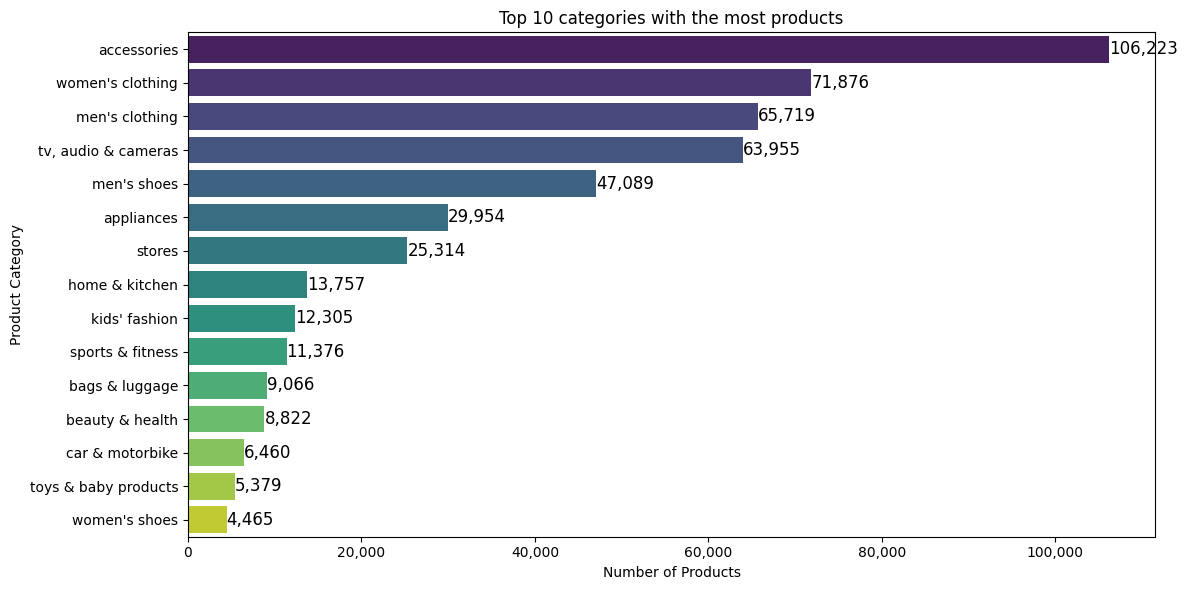

In [ ]:
# Group by 'main_category' and count the number of rows for each category
grouped_df = df.groupBy("main_category").agg(count("*").alias("count"))

# Order by the count in descending order and limit to the top 15 categories
top_15_df = grouped_df.orderBy(col("count").desc()).limit(15)

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting with seaborn
pandas_df = top_15_df.toPandas()

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="count", y="main_category", data=pandas_df, palette="viridis")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Format the data labels with a thousands comma separator and add them to the bars
for index, value in enumerate(pandas_df["count"]):
    ax.text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel("Number of Products")
ax.set_ylabel("Product Category")
ax.set_title("Top 10 categories with the most products")

plt.tight_layout()
plt.show()

# Let's focus our analysis on a specific category

<ipython-input-32-b05d33a917e7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="brand_count", y="brand", data=pandas_df, palette="viridis", ax=axes[0])
<ipython-input-32-b05d33a917e7>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_metric1", y="brand", data=pandas_df, palette="viridis", ax=axes[1])
<ipython-input-32-b05d33a917e7>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_metric2", y="brand", data=pandas_df, palette="viridis", ax=axes[2])


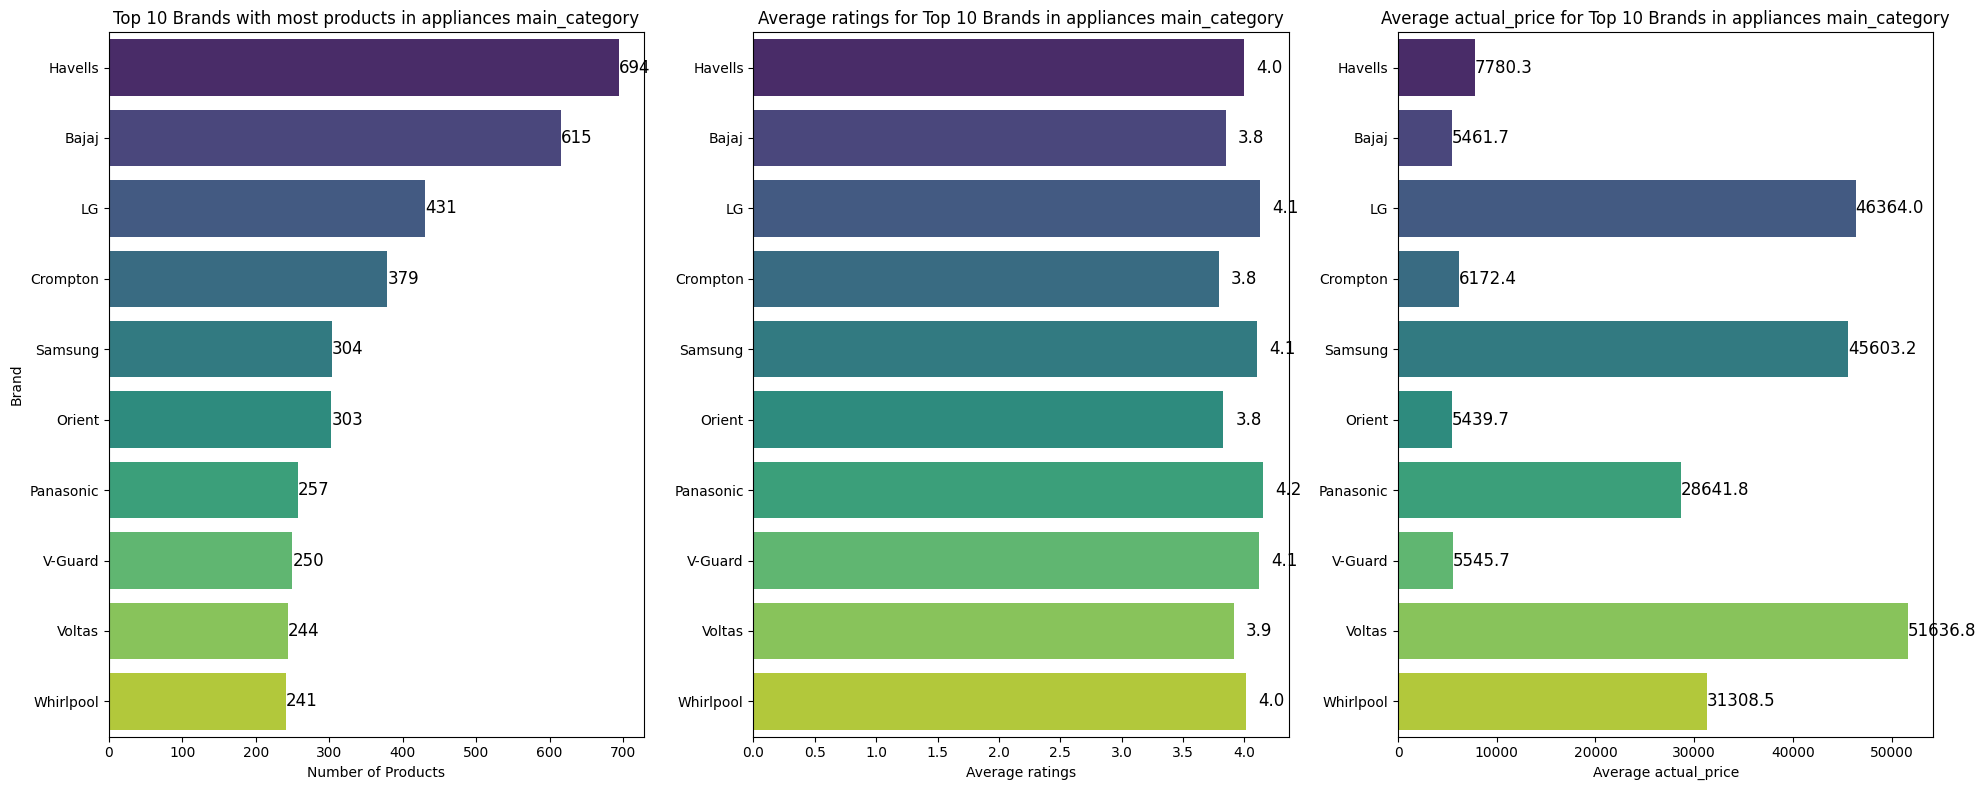

In [ ]:
# Define the variables that we want to specify
speci_cat = 'appliances'
metric1 = 'ratings'
metric2 = 'actual_price'

# Filter the DataFrame to keep only rows where 'main_category' is 'appliances'
filtered_df = df.filter(col("main_category") == speci_cat)

# Group by 'brand' and count the number of rows for each brand
grouped_df = filtered_df.groupBy("brand").agg(count("*").alias("brand_count"))

# Calculate the average metric (actual_price) for each brand
avg_metric1_df = filtered_df.groupBy("brand").agg(avg(metric1).alias("avg_metric1"))

# Calculate the average rating for each brand
avg_metric2_df = filtered_df.groupBy("brand").agg(avg(metric2).alias("avg_metric2"))

# Join the grouped_df, avg_metric_df, and avg_rating_df DataFrames on 'brand' to combine the information
pandas_df = grouped_df.join(avg_metric1_df, on="brand", how="inner").join(avg_metric2_df, on="brand", how="inner").toPandas()

# Sort the DataFrame in descending order based on brand count
pandas_df = pandas_df.sort_values(by="brand_count", ascending=False)

# Limit the result to the top 10 brands by count
pandas_df = pandas_df.head(10)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot the first horizontal bar chart for brand count
sns.barplot(x="brand_count", y="brand", data=pandas_df, palette="viridis", ax=axes[0])

# Format the data labels for brand count
for index, value in enumerate(pandas_df["brand_count"]):
    axes[0].text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

# Format the x-axis labels for brand count
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Set labels and title for the first plot
axes[0].set_xlabel("Number of Products")
axes[0].set_ylabel("Brand")
axes[0].set_title("Top 10 Brands with most products in " + speci_cat + " main_category")

# Plot the second horizontal bar chart for average metric (actual_price)
sns.barplot(x="avg_metric1", y="brand", data=pandas_df, palette="viridis", ax=axes[1])

# Set a small offset for the data labels
label_offset = 0.1

# Format the data labels for average metric (actaul_price)
for index, value in enumerate(pandas_df["avg_metric1"]):
    axes[1].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the second plot
axes[1].set_xlabel("Average " + metric1)
axes[1].set_ylabel("")  # Hide the ylabel for the second plot
axes[1].set_title("Average " + metric1 + " for Top 10 Brands in " + speci_cat + " main_category")

# Plot the third horizontal bar chart for average rating
sns.barplot(x="avg_metric2", y="brand", data=pandas_df, palette="viridis", ax=axes[2])

# Format the data labels for average rating
for index, value in enumerate(pandas_df["avg_metric2"]):
    axes[2].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the third plot
axes[2].set_xlabel("Average " + metric2)
axes[2].set_ylabel("")  # Hide the ylabel for the third plot
axes[2].set_title("Average " + metric2 + " for Top 10 Brands in " + speci_cat + " main_category")

# Adjust spacing between the subplots
plt.tight_layout()

# Display the plots
plt.show()

# Which specific products should we do a deep-dive on?

In [ ]:
#brands = ['LG','Samsung','Voltas'] # expensive
#brands = ['Panasonic','Whirlpool'] # medium
brands = ['Havells','V-Guard'] # cheap

#display product details as per filter
(df.filter(col("brand").isin(brands) & (col("main_category") == speci_cat))
              .sort(col("ratings").desc(), col("actual_price").asc())
              .limit(25)
              .toPandas())

,asin_id,brand,main_category,sub_category,product_name,discount_price,actual_price,product_url,image_count,videos_count,ratings
0,B05832182,Havells,appliances,Heating & Cooling Appliances,Havells Immersion Rod HP 10 Automatic Cut Off ...,1114.00,1199.0,https://www.amazon.in/Havells-Immersion-Automa...,10,1,5.0
1,B05296773,Havells,appliances,Kitchen & Home Appliances,Havells Ventil Air Hush 100mm Exhaust Fan (White),1198.00,1645.0,https://www.amazon.in/Havells-Ventil-100mm-Exh...,6,0,5.0
2,B06099447,Havells,appliances,All Appliances,Havells Ventil Air Hush 100mm Exhaust Fan (White),1198.00,1645.0,https://www.amazon.in/Havells-Ventil-100mm-Exh...,5,1,5.0
3,B07998953,Havells,appliances,Heating & Cooling Appliances,Havells Ventil Air Hush 100mm Exhaust Fan (White),1198.00,1645.0,https://www.amazon.in/Havells-Ventil-100mm-Exh...,5,1,5.0
4,B07238071,Havells,appliances,Heating & Cooling Appliances,"Havells Samraat Deco 74W Brown Ceiling Fan, Fh...",2949.00,3080.0,https://www.amazon.in/Havells-Samraat-Brown-Ce...,1,1,5.0
5,B07120609,Havells,appliances,Heating & Cooling Appliances,"Havells Samraat 1200Mm Brown Ceiling Fan, Fhcs...",2299.00,3220.0,https://www.amazon.in/Havells-Samraat-1200Mm-C...,7,1,5.0
6,B07046793,V-Guard,appliances,Kitchen & Home Appliances,V-Guard GLADO PRIME 400 TITANIUM ROSE 1200 mm ...,3499.00,3690.0,https://www.amazon.in/V-Guard-GLADO-PRIME-TITA...,5,0,5.0
7,B03655271,V-Guard,appliances,All Appliances,V-Guard GLADO PRIME 400 TITANIUM ROSE 1200 mm ...,3499.00,3690.0,https://www.amazon.in/V-Guard-GLADO-PRIME-TITA...,9,2,5.0
8,B04370153,V-Guard,appliances,All Appliances,V-Guard GLADO PRIME 400 TITANIUM ROSE 1200 mm ...,3499.00,3690.0,https://www.amazon.in/V-Guard-GLADO-PRIME-TITA...,3,2,5.0
9,B05650988,V-Guard,appliances,Heating & Cooling Appliances,V-Guard GLADO PRIME 400 TITANIUM ROSE 1200 mm ...,3499.00,3690.0,https://www.amazon.in/V-Guard-GLADO-PRIME-TITA...,6,0,5.0


# How many images and videos should the products have?

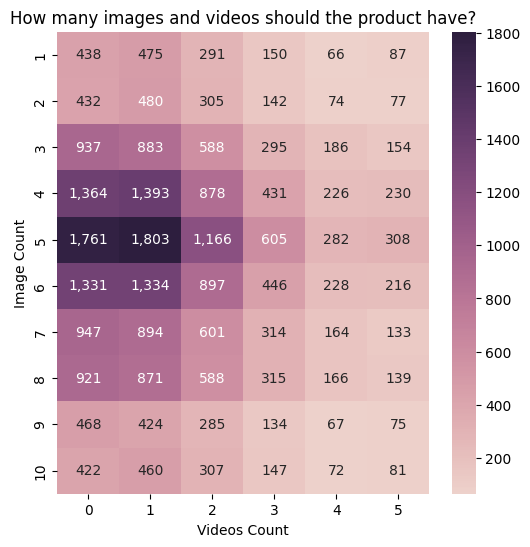

In [ ]:
#brands = ['LG','Samsung','Voltas'] # expensive
#brands = ['Panasonic','Whirlpool'] # medium
brands = ['Havells','V-Guard'] # cheap


df_filtered = df.filter(col("brand").isin(brands) & (col("main_category") == speci_cat))

# Group by 'image_count' and 'videos_count' and count the occurrences
grouped_df = filtered_df.groupBy("image_count", "videos_count").count()

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = grouped_df.toPandas()

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 6))
heatmap_data = pandas_df.pivot(index="image_count", columns="videos_count", values="count")
sns.heatmap(heatmap_data, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True, fmt=",g")

# Customize the plot
plt.xlabel("Videos Count")
plt.ylabel("Image Count")
plt.title("How many images and videos should the product have?", fontsize=12)

# Show the plot
plt.show()